### Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from apriori_python import apriori
import time 
from apyori import apriori as apriory2 
from efficient_apriori import apriori as apriory3
from fpgrowth_py import fpgrowth

ModuleNotFoundError: No module named 'apriori_python'

### Загрузка данных

In [ ]:
df = pd.read_csv('Market_Basket_Optimisation.csv')
display(df.head())

### Визуализация частот

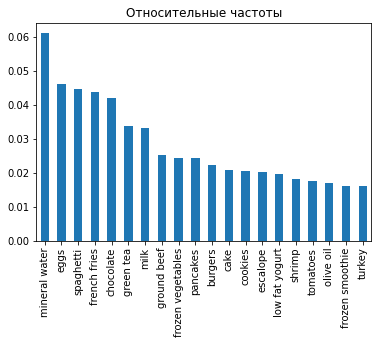

In [18]:
# Относительные частоты
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')
plt.title('Относительные частоты')
plt.show()

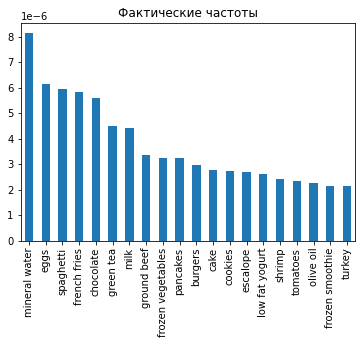

In [17]:
# фактические частоты
df.stack().value_counts(normalize=True).head(20).apply(lambda item:item / df.shape[0]).plot(kind='bar')
plt.title('Фактические частоты')
plt.show()

# Применение алгоритма Apriori

In [28]:
transactions = []
for i in range (df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

### apriori_python

In [37]:
t = []
start = time.perf_counter()
t1, rules = apriori(transactions,minSup = 0.03, minConf = 0.25)
time1 = (time.perf_counter()-start)
t.append(time1)
display(rules)
print('Затраченное время', t[-1])

[[{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'milk'}, {'spaghetti'}, 0.2736625514403292],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'pancakes'}, {'mineral water'}, 0.3548387096774194],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'frozen vegetables'}, {'mineral water'}, 0.3748251748251748],
 [{'ground beef'}, {'spaghetti'}, 0.3989145183175034],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

Затраченное время 3.389043700000002


### apyori

In [38]:
start = time.perf_counter()
rules = apriory2(transactions=transactions,min_support = 0.03, min_confidence = 0.25, min_lift=1.0001)
results = list(rules)
time2 = (time.perf_counter()-start)
t.append(time2)

for result in results:
    for subset in result[2]:
        print(subset[0],subset[1])
        print("Support: {0}; Confidence {1}; Lift {2}; ".format(result[1],subset[2],subset[3]))
        print()
print('Затраченное время', t[-1])

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667; Confidence 0.32139951179820997; Lift 1.3489067367020564; 

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05093333333333333; Confidence 0.28338278931750743; Lift 1.1893513821383916; 

frozenset({'frozen vegetables'}) frozenset({'mineral water'})
Support: 0.03573333333333333; Confidence 0.3748251748251748; Lift 1.5731330784492508; 

frozenset({'ground beef'}) frozenset({'mineral water'})
Support: 0.040933333333333335; Confidence 0.41655359565807326; Lift 1.7482663499919135; 

frozenset({'ground beef'}) frozenset({'spaghetti'})
Support: 0.0392; Confidence 0.39891451831750335; Lift 2.2908567284695827; 

frozenset({'milk'}) frozenset({'mineral water'})
Support: 0.048; Confidence 0.3703703703703704; Lift 1.5544363613753656; 

frozenset({'milk'}) frozenset({'spaghetti'})
Support: 0.03546666666666667; Confidence 0.27366255144032925; Lift 1.5715690166940808; 

frozenset({'pancakes'}) frozenset({'mi

### efficient_apriori

In [39]:
start = time.perf_counter()
itemsets, rules = apriory3(transactions,min_support = 0.03, min_confidence = 0.25)
time3 = (time.perf_counter()-start)
t.append(time3)

for i in range(len(rules)):
    print(rules[i])
    print()
print('Затраченное время', t[-1])

{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)

{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)

{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.573, conv: 1.218)

{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)

{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)

{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)

{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)

{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)

{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)

{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)

Затраченное время 0.05018219999988105


# Алгоритм FP-Growth

In [40]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions,minSupRatio = 0.03, minConf = 0.25)
time4 = (time.perf_counter()-start)
t.append(time4)

for i in range(len(rules)):
    print(rules[i])
    print()
print('Затраченное время', t[-1])

[{'pancakes'}, {'mineral water'}, 0.3548387096774194]

[{'frozen vegetables'}, {'mineral water'}, 0.3748251748251748]

[{'ground beef'}, {'spaghetti'}, 0.3989145183175034]

[{'ground beef'}, {'mineral water'}, 0.41655359565807326]

[{'milk'}, {'spaghetti'}, 0.2736625514403292]

[{'milk'}, {'mineral water'}, 0.37037037037037035]

[{'chocolate'}, {'mineral water'}, 0.3213995117982099]

[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]

[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]

[{'eggs'}, {'mineral water'}, 0.28338278931750743]

Затраченное время 1.2060320000000502


### Сравнение времени выполнения всех алгоритмов

apriori 1 time: 3.389043700000002
apriori 2 time: 0.055998999999928856
apriori 3 time: 0.05018219999988105
fpgrowth time: 1.2060320000000502


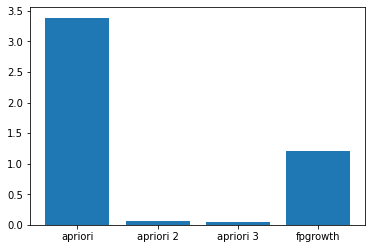

In [42]:
print("apriori 1 time:",t[0])
print("apriori 2 time:",t[1])
print("apriori 3 time:",t[2])
print("fpgrowth time:",t[3])
plt.bar(['apriori','apriori 2', 'apriori 3', 'fpgrowth'],t)
plt.show()

# Работа с данными "data.csv"

### Загрузка данных

In [44]:
df = pd.read_csv('data.csv')
display(df.head())

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Визуализация частот

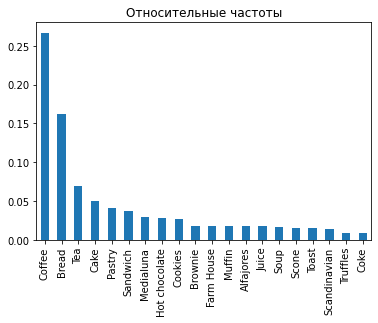

In [45]:
# Относительные частоты
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')
plt.title('Относительные частоты')
plt.show()

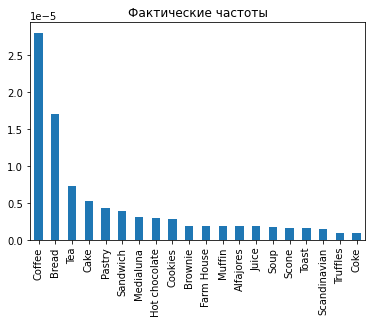

In [46]:
# фактические частоты
df.stack().value_counts(normalize=True).head(20).apply(lambda item:item / df.shape[0]).plot(kind='bar')
plt.title('Фактические частоты')
plt.show()

# Применение алгоритма Apriori

In [47]:
transactions = []
for i in range (df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

### apriori_python

In [48]:
t = []
start = time.perf_counter()
t1, rules = apriori(transactions,minSup = 0.03, minConf = 0.25)
time1 = (time.perf_counter()-start)
t.append(time1)
display(rules)
print('Затраченное время', t[-1])

[[{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692]]

Затраченное время 1.161584400000038


### apyori

In [49]:
start = time.perf_counter()
rules = apriory2(transactions=transactions,min_support = 0.03, min_confidence = 0.25, min_lift=1.0001)
results = list(rules)
time2 = (time.perf_counter()-start)
t.append(time2)

for result in results:
    for subset in result[2]:
        print(subset[0],subset[1])
        print("Support: {0}; Confidence {1}; Lift {2}; ".format(result[1],subset[2],subset[3]))
        print()
print('Затраченное время', t[-1])

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785; Confidence 0.5269582909460834; Lift 1.109079618532724; 

frozenset({'Medialuna'}) frozenset({'Coffee'})
Support: 0.034942287513116475; Confidence 0.5692307692307693; Lift 1.1980497417776572; 

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.0472193074501574; Confidence 0.5521472392638037; Lift 1.162094344121919; 

frozenset({'Sandwich'}) frozenset({'Coffee'})
Support: 0.037985309548793283; Confidence 0.5323529411764706; Lift 1.1204336416545417; 

Затраченное время 0.023991300000034244


### efficient_apriori

In [50]:
start = time.perf_counter()
itemsets, rules = apriory3(transactions,min_support = 0.03, min_confidence = 0.25)
time3 = (time.perf_counter()-start)
t.append(time3)

for i in range(len(rules)):
    print(rules[i])
    print()
print('Затраченное время', t[-1])

{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)

{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)

{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)

{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)

{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)

{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)

Затраченное время 0.02003370000011273


# Алгоритм FP-Growth

In [51]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions,minSupRatio = 0.03, minConf = 0.25)
time4 = (time.perf_counter()-start)
t.append(time4)

for i in range(len(rules)):
    print(rules[i])
    print()
print('Затраченное время', t[-1])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]

[{'Cookies'}, {'Coffee'}, 0.5184466019417475]

[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]

[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]

[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]

[{'Pastry'}, {'Bread'}, 0.33865030674846625]

[{'Pastry'}, {'Coffee'}, 0.5521472392638037]

[{'Cake'}, {'Coffee'}, 0.5269582909460834]

[{'Tea'}, {'Coffee'}, 0.3496296296296296]

[{'Bread'}, {'Coffee'}, 0.2751937984496124]

Затраченное время 0.4656134000001657


### Сравнение времени выполнения всех алгоритмов

apriori 1 time: 1.161584400000038
apriori 2 time: 0.023991300000034244
apriori 3 time: 0.02003370000011273
fpgrowth time: 0.4656134000001657


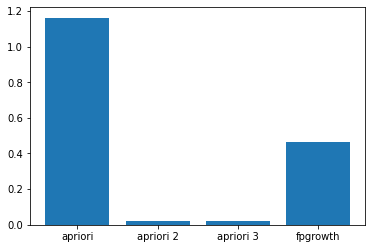

In [52]:
print("apriori 1 time:",t[0])
print("apriori 2 time:",t[1])
print("apriori 3 time:",t[2])
print("fpgrowth time:",t[3])
plt.bar(['apriori','apriori 2', 'apriori 3', 'fpgrowth'],t)
plt.show()